**Authors**: CARAYON Chloé - TAILLIEU Victor

**Date**: 04/02/2021

---
# Project 1:  Scraping, Text Preprocessing, Classification & Sentiment Analysis 

---


# PART A

## Import

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import walk
import re
import pickle as pkl
import string

import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger') 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

from brokenaxes import brokenaxes

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Preprocessing

In [2]:
path = 'presidents-speeches/'
dico = {}
dates = []

for (root, dirs, files) in walk(path): 
    if len(dirs) == 0:
        president_name = root.split("/")[1]
        for i in range(len(files)):
            file_path = "{}/{}".format(root,files[i])
            with open(file_path, 'r') as file:
                text = str(eval(file.read()), "utf-8")

            dico[text] = president_name
            dates.append(re.search("(.*)__", files[i])[1])

df = pd.DataFrame(dico.items(), columns = ["Speech", "President"])
df["Date"] = pd.to_datetime(dates, format='%B %d, %Y').date
df

Speech         President  \
0    Good evening. As I am speaking to you now, Gen...     Ronald Reagan   
1    This is the 34th time I'll speak to you from t...     Ronald Reagan   
2    My fellow Americans:\r\nI've spoken to you fro...     Ronald Reagan   
3    Mr. President, Mrs. Ford, Mr. Vice President, ...     Ronald Reagan   
4    Mr. Chairman, Mr. Vice President, delegates to...     Ronald Reagan   
..                                                 ...               ...   
370  To the Senate and House of Representatives of ...  Thomas Jefferson   
371  TO BROTHER HANDSOME LAKE:           I have rec...  Thomas Jefferson   
372  TO THE SENATE AND HOUSE OF REPRESENTATIVES OF ...  Thomas Jefferson   
373   GENTLEMAN,   I have received the remonstrance...  Thomas Jefferson   
374   FELLOW CITIZENS OF THE SENATE AND HOUSE OF RE...  Thomas Jefferson   

           Date  
0    1987-12-10  
1    1989-01-11  
2    1987-03-04  
3    1976-08-19  
4    1984-08-23  
..          ...  
370  1804-11-08  
371  1802-11-03  
372  1806-12-02  
373  1801-07-12  
374  1801-12-08  

[375 rows x 3 columns]

In [3]:
df.President.value_counts()

Ronald Reagan            59
Barack Obama             50
Franklin D. Roosevelt    49
Bill Clinton             39
George W. Bush           39
Andrew Jackson           26
Thomas Jefferson         24
George H. W. Bush        23
Richard M. Nixon         23
Donald Trump             22
George Washington        21
Name: President, dtype: int64

In [4]:
president_dict = {'Andrew Jackson': 0,
                  'Barack Obama': 1,
                  'Bill Clinton': 2,
                  'Donald Trump': 3,
                  'Franklin D. Roosevelt': 4,
                  'George H. W. Bush': 5,
                  'George W. Bush': 6,
                  'George Washington': 7,
                  'Richard M. Nixon': 8,
                  'Ronald Reagan': 9,
                  'Thomas Jefferson': 10}
president_dict_inv = {v: k for k, v in president_dict.items()}

df['President'] = df['President'].map(president_dict)

In [5]:
def preprocessing(text): 
    sents = nltk.sent_tokenize(text)
    words = [word_tokenize(s.lower()) for s in sents]
    sentences = [[e for e in word if not e in stopwords.words("english")] for word in words]

    # sentences = lemmatizer_speech(sentences)
    return sentences


def lemmatizer_speech(text):
    lemmatizer = WordNetLemmatizer()
    data = []
    for words in sentences:
        data_clean_word_lemmatized = []
        for i, word in enumerate(words):
            pos = get_wordnet_pos(pos_tag([word])[0][1])
            if pos is not '':
                data_clean_word_lemmatized.append(lemmatizer.lemmatize(word, pos))
            else:
                data_clean_word_lemmatized.append(word)
        data.append(data_clean_word_lemmatized)
    return data


def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    return ''


def tfidifprocessing(text):
    text = [[e for e in word if e.isalpha()] for word in text]
    data = [' '.join(ele) for ele in text] 
    return ' '.join(data)


In [6]:
data = df.copy()

data['Speech'] = data['Speech'].map(preprocessing)

print(data['Speech'])

0      [[good, evening, .], [speaking, ,, general, se...
1      [[34th, time, 'll, speak, oval, office, ,, las...
2      [[fellow, americans, :, 've, spoken, historic,...
3      [[mr., president, ,, mrs., ford, ,, mr., vice,...
4      [[mr., chairman, ,, mr., vice, president, ,, d...
                             ...                        
370    [[senate, house, representatives, united, stat...
371    [[brother, handsome, lake, :, received, messag...
372    [[senate, house, representatives, united, stat...
373    [[gentleman, ,, received, remonstrance, please...
374    [[fellow, citizens, senate, house, representat...
Name: Speech, Length: 375, dtype: object


In [7]:
data_A = data.copy()
data_A['Speech'] = data_A['Speech'].map(tfidifprocessing)

print(data_A['Speech'])

0      good evening speaking general secretary gorbac...
1      time speak oval office last together eight yea...
2      fellow americans spoken historic office many o...
3      president ford vice president vice distinguish...
4      chairman vice president delegates convention f...
                             ...                        
370    senate house representatives united states peo...
371    brother handsome lake received message writing...
372    senate house representatives united states con...
373    gentleman received remonstrance pleased addres...
374    fellow citizens senate house representatives c...
Name: Speech, Length: 375, dtype: object


### TF IDF

In [8]:
words_train, words_test, y_train, y_test = train_test_split(data_A.Speech, data_A[['President']], test_size=0.2, random_state=42)


vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(words_train)
X_test = vectorizer.transform(words_test)

In [9]:
print(vectorizer.get_feature_names()[:10])
print(X_train.shape)

['aaa', 'aaron', 'aarp', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abandons', 'abatement', 'abbas']
(300, 21103)


## Models 

### Support Vector Machines (SVM)

In [10]:
accuracy_models = pd.DataFrame(columns = ["Model", "Accuracy"])

In [11]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
_prediction = pd.DataFrame(y_pred, columns = ["President"])

print(confusion_matrix(y_train, svc.predict(X_train)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

new_row = {'Model': 'Support Vector Machines', 'Accuracy': round(svc.score(X_test, y_test), 2)}
accuracy_models = accuracy_models.append(new_row, ignore_index=True)

# on a testé sigmoid et on a obtenu des résultats simulaires
# donc on va tenter d'autres modeles

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
[[21  0  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  0  0]
 [ 0  0  0 19  0  0  0  0  0  0  0]
 [ 0  0  0  0 40  0  0  0  0  0  0]
 [ 0  0  0  0  0 19  0  0  0  1  0]
 [ 0  0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0  0 16  0  0  0]
 [ 0  0  0  0  0  0  0  0 17  0  0]
 [ 0  0  0  0  0  0  0  0  0 43  0]
 [ 0  0  0  0  0  0  0  0  0  0 22]]
[[ 5  0  0  0  0  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0  0  0  0  0]
 [ 0  1  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  1  0  0  0  0]
 [ 0  0  0  0  9  0  0  0  0  0  0]
 [ 0  0  1  0  0  1  0  0  0  1  0]
 [ 0  1  1  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  0  1]
 [ 0  0  1  0  0  0  0  0  3  2  0]
 [ 0  0  

### KNN



In [12]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train) 
KNeighborsClassifier(n_neighbors=9)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_train, knn.predict(X_train)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

new_row = {'Model': 'KNeighbors Classifier', 'Accuracy': round(knn.score(X_test, y_test), 2)}
accuracy_models = accuracy_models.append(new_row, ignore_index=True)

[[21  0  0  0  0  0  0  0  0  0  0]
 [ 0 37  2  0  0  0  3  0  0  0  0]
 [ 0  4 24  1  0  1  0  0  0  0  0]
 [ 0  5  1 13  0  0  0  0  0  0  0]
 [ 2  0  0  0 38  0  0  0  0  0  0]
 [ 0  1  4  0  0 14  0  0  0  1  0]
 [ 0  8  0  2  0  0 19  0  0  1  0]
 [11  0  0  0  0  0  0  5  0  0  0]
 [ 0  0  0  1  0  0  0  0 15  1  0]
 [ 0  0  2  0  1  1  0  0  0 39  0]
 [12  0  0  0  0  0  0  0  0  0 10]]
[[ 5  0  0  0  0  0  0  0  0  0  0]
 [ 0  7  0  1  0  0  0  0  0  0  0]
 [ 0  1  6  0  0  2  0  0  0  0  0]
 [ 0  1  0  2  0  0  0  0  0  0  0]
 [ 0  0  1  0  8  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  1  0]
 [ 0  1  2  0  0  0  6  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  3  1  0]
 [ 0  0  1  0  0  0  1  0  1 13  0]
 [ 1  0  0  0  0  0  0  0  0  0  1]]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.70      0.88      0.78         8
           2       0.43      0.67      0.52

### Naives Bayes

In [13]:
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())

print(confusion_matrix(y_train, gnb.predict(X_train.toarray())))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

new_row = {'Model': 'Naives Bayes', 'Accuracy': round(gnb.score(X_test.toarray(), y_test), 2)}
accuracy_models = accuracy_models.append(new_row, ignore_index=True)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
[[21  0  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  0  0]
 [ 0  0  0 19  0  0  0  0  0  0  0]
 [ 0  0  0  0 40  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0  0 16  0  0  0]
 [ 0  0  0  0  0  0  0  0 17  0  0]
 [ 0  0  0  0  0  0  0  0  0 43  0]
 [ 0  0  0  0  0  0  0  0  0  0 22]]
[[ 5  0  0  0  0  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0  0  0  0  0]
 [ 0  2  6  0  0  0  1  0  0  0  0]
 [ 0  0  0  2  0  0  1  0  0  0  0]
 [ 0  1  0  0  6  0  0  0  0  2  0]
 [ 0  2  0  0  0  0  0  0  0  1  0]
 [ 0  5  0  0  0  0  3  0  0  1  0]
 [ 5  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  5  0]
 [ 0  0  

### Logistic Regression

In [14]:
log = LogisticRegression()
log.fit(X_train,y_train)
y_pred = log.predict(X_test)

print(confusion_matrix(y_train, log.predict(X_train)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

new_row = {'Model': 'Logistic Regression', 'Accuracy': round(log.score(X_test, y_test), 2)}
accuracy_models = accuracy_models.append(new_row, ignore_index=True)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
[[21  0  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  0  0]
 [ 0  2  1 16  0  0  0  0  0  0  0]
 [ 0  0  0  0 40  0  0  0  0  0  0]
 [ 0  0  0  0  0 16  0  0  0  4  0]
 [ 0  2  0  0  0  0 27  0  0  1  0]
 [ 0  0  0  0  0  0  0 16  0  0  0]
 [ 0  0  0  0  0  0  0  0 12  5  0]
 [ 0  0  0  0  0  0  0  0  0 43  0]
 [ 0  0  0  0  0  0  0  0  0  0 22]]
[[ 4  0  0  0  0  0  0  0  0  0  1]
 [ 0  8  0  0  0  0  0  0  0  0  0]
 [ 0  1  8  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  9  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  2  0]
 [ 0  2  1  0  0  0  6  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  1  5  0]
 [ 0  0  

## Results

In [15]:
print(accuracy_models.sort_values('Accuracy', ascending=False))

                     Model  Accuracy
0  Support Vector Machines      0.87
3      Logistic Regression      0.71
1    KNeighbors Classifier      0.68
2             Naives Bayes      0.63


### Support Vector Machines 

Our most efficient model:

In [16]:
j = {'predicted': _prediction['President'].tolist(), 'realistic': y_test['President'].tolist()}
results = pd.DataFrame(j)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


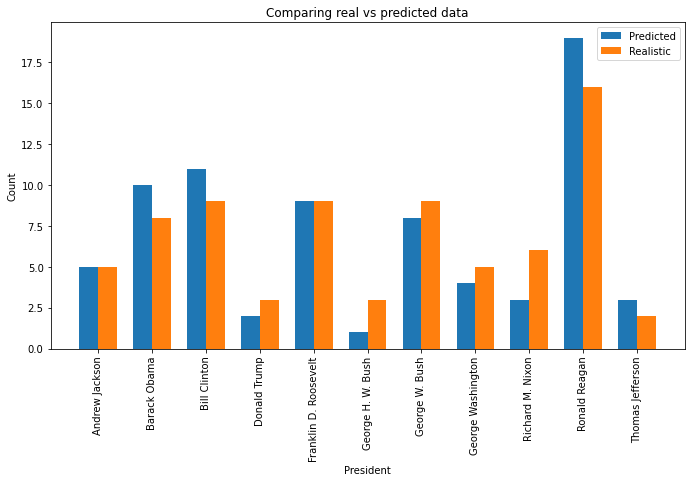

In [17]:
index = np.arange(11)
bar_width = 0.35

fig = plt.figure(figsize=(25,6))

ax = fig.add_subplot(121)

ax.bar(index, results['predicted'].value_counts().sort_index(), bar_width, label = "Predicted")
ax.bar(index + bar_width, results['realistic'].value_counts().sort_index(), bar_width, label = "Realistic")

ax.set_xlabel('President')
ax.set_ylabel('Count')
ax.set_title('Comparing real vs predicted data')
ax.legend()
ax.set_xticklabels(list(president_dict.keys()))
ax.set_xticks(index + bar_width / 2)
plt.xticks(rotation=90)

plt.show()

## Improvements

Transform unbalanced dataset in balanced one.

In [45]:
data_ = data_A.copy()

data_.drop(data_.query('President == 9').sample(frac=.57, random_state=150).index, inplace=True)
data_.drop(data_.query('President == 1').sample(frac=.5, random_state=150).index, inplace=True)
data_.drop(data_.query('President == 4').sample(frac=.48, random_state=150).index, inplace=True)
data_.drop(data_.query('President == 6').sample(frac=.35, random_state=150).index, inplace=True)
data_.drop(data_.query('President == 2').sample(frac=.35, random_state=150).index, inplace=True)

data_.President.value_counts()

0     26
1     25
2     25
4     25
6     25
9     25
10    24
5     23
8     23
3     22
7     21
Name: President, dtype: int64

Remove words

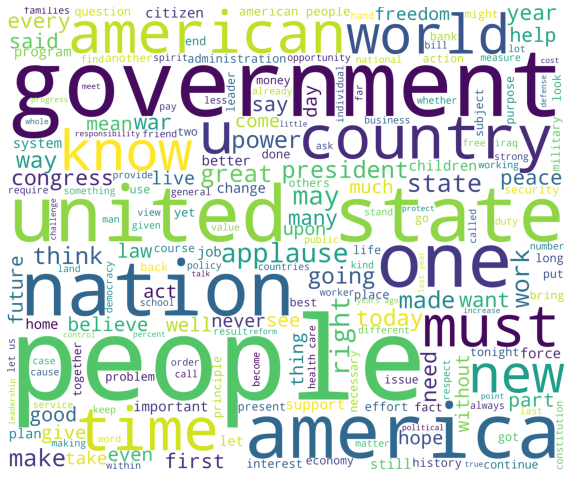

In [19]:
from wordcloud import WordCloud,STOPWORDS
words = ' '.join(data_['Speech'])
wordcloud = WordCloud(background_color='white',
                      width=3000,
                      height=2500
                     ).generate(words)

plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [20]:
stopwords_cust = nltk.corpus.stopwords.words('english')
newStopWords = ['country','people','united','state','government', 'one', 'nation']

stopwords_cust.extend(newStopWords)

Implement model with balanced and cleaned dataset.

In [21]:
vectorizer = TfidfVectorizer(stop_words=stopwords_cust)

words_train, words_test, y_train, y_test = train_test_split(data_.Speech, data_[['President']], test_size=0.2, random_state=42, stratify=data_[['President']])

X_train = vectorizer.fit_transform(words_train)
X_test = vectorizer.transform(words_test)

In [22]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
_prediction = pd.DataFrame(y_pred, columns = ["President"])

print(confusion_matrix(y_train, svc.predict(X_train)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
[[21  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0]
 [ 0  0  0 18  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0]
 [ 0  0  0  0  0 18  0  0  0  0  0]
 [ 0  1  0  0  0  0 19  0  0  0  0]
 [ 0  0  0  0  0  0  0 17  0  0  0]
 [ 0  0  0  0  0  0  0  0 18  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0  0  0  0 19]]
[[4 0 0 0 0 0 0 1 0 0 0]
 [0 5 0 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 2 0]
 [0 1 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 0 5]]
              precision    recall  f1-score   support

  

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator


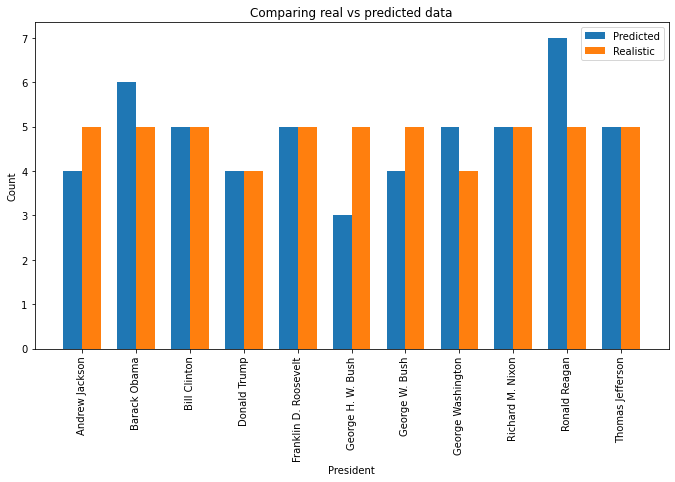

In [23]:
j = {'predicted': _prediction['President'].tolist(), 'realistic': y_test['President'].tolist()}
results = pd.DataFrame(j)

index = np.arange(11)
bar_width = 0.35

fig = plt.figure(figsize=(25,6))
ax = fig.add_subplot(121)

ax.bar(index, results['predicted'].value_counts().sort_index(), bar_width, label = "Predicted")
ax.bar(index + bar_width, results['realistic'].value_counts().sort_index(), bar_width, label = "Realistic")

ax.set_xlabel('President')
ax.set_ylabel('Count')
ax.set_title('Comparing real vs predicted data')
ax.legend()
ax.set_xticklabels(list(president_dict.keys()))
ax.set_xticks(index + bar_width / 2)
plt.xticks(rotation=90)

plt.show()

In [24]:
# with open("model.pkl", 'wb') as file:
#     pkl.dump(svc, file)

with open("model.pkl", 'rb') as file:
    model = pkl.load(file)

## Example

In [25]:
def predict_president(file_path):
    with open(file_path, 'r') as file:
        speech = str(eval(file.read()), "utf-8")

    processed_speech = tfidifprocessing(preprocessing(speech))
    vectorized_speech = vectorizer.transform([processed_speech])

    return president_dict_inv[int(model.predict(vectorized_speech))]

predict_president('presidents-speeches/Barack Obama/speeches/January 20, 2009__InauguralAddress.txt')

'Barack Obama'

# PART B

In [26]:
df_dates = data.copy()
president_year_dict = {0: 1829,
                       1: 2009,
                       2: 1993,
                       3: 2017,
                       4: 1933,
                       5: 1989,
                       6: 2001,
                       7: 1789,
                       8: 1969,
                       9: 1981,
                       10: 1801}

df_dates['Elected_year'] = df_dates['President'].map(president_year_dict)

### Order by elected year

In [27]:
df_dates.sort_values(by=['Elected_year'], inplace=True)

df_dates

Speech  President        Date  \
243  [[beloved, cherokees, ,, many, years, passed, ...          7  1796-08-29   
252  [[fellow-citizens, :, called, upon, voice, cou...          7  1793-03-04   
251  [[whereas, commissioners, appointed, president...          7  1795-07-10   
250  [[fellow, citizens, senate, house, representat...          7  1794-11-19   
249  [[whereas, appears, state, war, exists, austri...          7  1793-04-22   
..                                                 ...        ...         ...   
257  [[president, :, thank, ,, everybody, .], [than...          3  2017-06-29   
256  [[president, :, thank, much, .], [thank, .], [...          3  2017-12-18   
255  [[president, :, fellow, americans, ,, today, s...          3  2018-02-15   
264  [[president, :, thank, ,, paul, mitch, ,, intr...          3  2018-02-01   
259  [[hello, ,, everybody, .], [well, ,, thank, mu...          3  2020-01-03   

     Elected_year  
243          1789  
252          1789  
251          1789  
250          1789  
249          1789  
..            ...  
257          2017  
256          2017  
255          2017  
264          2017  
259          2017  

[375 rows x 4 columns]

### Order by speech

In [28]:
df_dates.sort_values(by=['Date'], inplace=True)

df_dates

Speech  President        Date  \
240  [[fellow, citizens, senate, house, representat...          7  1789-04-30   
235  [[whereas, duty, nations, acknowledge, provide...          7  1789-10-03   
237  [[fellow, citizens, senate, house, representat...          7  1790-01-08   
247  [[fellow, citizens, senate, house, representat...          7  1790-12-08   
242  [[president, united, states, ,, mouth, ,, writ...          7  1790-12-29   
..                                                 ...        ...         ...   
271  [[president, trump, :, thank, much, .], [mr., ...          3  2019-09-24   
262  [[president, trump, :, thank, much, .], [thank...          3  2019-09-25   
266  [[last, night, ,, united, states, brought, wor...          3  2019-10-27   
259  [[hello, ,, everybody, .], [well, ,, thank, mu...          3  2020-01-03   
272  [[long, president, united, states, ,, iran, ne...          3  2020-01-08   

     Elected_year  
240          1789  
235          1789  
237          1789  
247          1789  
242          1789  
..            ...  
271          2017  
262          2017  
266          2017  
259          2017  
272          2017  

[375 rows x 4 columns]

## VADER extracts sentiments 

In [29]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

df_vader = df_dates.copy()

### Technic 1

In [30]:
def sentiment_scores(speech):
    dico = {"Pos": 0, "Neu": 0, "Neg": 0}
    for (pos, neu, neg) in zip(speech["Positive_Sentiment"], speech["Neutral_Sentiment"], speech["Negative_Sentiment"]):
        if pos == max(pos, neu, neg):
            dico["Pos"] += 1
        elif neu == max(pos, neu, neg):
            dico["Neu"] += 1
        else:
            dico["Neg"] += 1

    nb_speeches = sum(dico.values())
    for item in dico:
        dico[item] = round(dico[item] / nb_speeches, 2)

    return dico


def sentiment_list(sentence, type):
    sentiment = [] 
    for sent in sentence:
        sent = ' '.join(sent)
        score = analyser.polarity_scores(sent)
        sentiment.append(score[type])
        
    return sentiment



In [31]:
df_vader['Positive_Sentiment'] = df_vader['Speech'].map(lambda x: sentiment_list(x, "pos"))
df_vader['Neutral_Sentiment'] = df_vader['Speech'].map(lambda x: sentiment_list(x, "neu"))
df_vader['Negative_Sentiment'] = df_vader['Speech'].map(lambda x: sentiment_list(x, "neg"))

df_vader.apply(sentiment_scores, axis=1)

df_vader = df_vader.drop(columns=["Negative_Sentiment", "Neutral_Sentiment", "Positive_Sentiment"])

### Technic 2

In [32]:
def sentiment(sentence, type):
    sentiment = [] 
    sum_sent = 0
    for sent in sentence:
        sent = ' '.join(sent)
        score = analyser.polarity_scores(sent)
        sentiment.append(score[type])
        sum_sent += score[type]
        
    return sum_sent / len(sentiment)


In [33]:
df_vader = df_dates.copy()
df_vader['Positive'] = df_vader['Speech'].map(lambda x: sentiment(x, "pos"))
df_vader['Neutral'] = df_vader['Speech'].map(lambda x: sentiment(x, "neu"))
df_vader['Negative'] = df_vader['Speech'].map(lambda x: sentiment(x, "neg"))

In [34]:
df_vader

Speech  President        Date  \
240  [[fellow, citizens, senate, house, representat...          7  1789-04-30   
235  [[whereas, duty, nations, acknowledge, provide...          7  1789-10-03   
237  [[fellow, citizens, senate, house, representat...          7  1790-01-08   
247  [[fellow, citizens, senate, house, representat...          7  1790-12-08   
242  [[president, united, states, ,, mouth, ,, writ...          7  1790-12-29   
..                                                 ...        ...         ...   
271  [[president, trump, :, thank, much, .], [mr., ...          3  2019-09-24   
262  [[president, trump, :, thank, much, .], [thank...          3  2019-09-25   
266  [[last, night, ,, united, states, brought, wor...          3  2019-10-27   
259  [[hello, ,, everybody, .], [well, ,, thank, mu...          3  2020-01-03   
272  [[long, president, united, states, ,, iran, ne...          3  2020-01-08   

     Elected_year  Positive   Neutral  Negative  
240          1789  0.239600  0.705280  0.055120  
235          1789  0.461800  0.519800  0.018400  
237          1789  0.340524  0.619286  0.040190  
247          1789  0.213425  0.735000  0.051575  
242          1789  0.254333  0.636275  0.109392  
..            ...       ...       ...       ...  
271          2017  0.253991  0.634438  0.111558  
262          2017  0.170226  0.765041  0.064730  
266          2017  0.207929  0.552571  0.239500  
259          2017  0.303750  0.546389  0.149806  
272          2017  0.194862  0.654969  0.150262  

[375 rows x 7 columns]

### COUNT Positive and Negative speeches 

In [35]:
def sentiment_speech(speech):
    if speech["Positive"] >= speech["Negative"]:
        return 1   
    else:
        return 0

In [36]:
df_vader["Sentiment"] = df_vader.apply(sentiment_speech, axis=1)
df_vader

Speech  President        Date  \
240  [[fellow, citizens, senate, house, representat...          7  1789-04-30   
235  [[whereas, duty, nations, acknowledge, provide...          7  1789-10-03   
237  [[fellow, citizens, senate, house, representat...          7  1790-01-08   
247  [[fellow, citizens, senate, house, representat...          7  1790-12-08   
242  [[president, united, states, ,, mouth, ,, writ...          7  1790-12-29   
..                                                 ...        ...         ...   
271  [[president, trump, :, thank, much, .], [mr., ...          3  2019-09-24   
262  [[president, trump, :, thank, much, .], [thank...          3  2019-09-25   
266  [[last, night, ,, united, states, brought, wor...          3  2019-10-27   
259  [[hello, ,, everybody, .], [well, ,, thank, mu...          3  2020-01-03   
272  [[long, president, united, states, ,, iran, ne...          3  2020-01-08   

     Elected_year  Positive   Neutral  Negative  Sentiment  
240          1789  0.239600  0.705280  0.055120          1  
235          1789  0.461800  0.519800  0.018400          1  
237          1789  0.340524  0.619286  0.040190          1  
247          1789  0.213425  0.735000  0.051575          1  
242          1789  0.254333  0.636275  0.109392          1  
..            ...       ...       ...       ...        ...  
271          2017  0.253991  0.634438  0.111558          1  
262          2017  0.170226  0.765041  0.064730          1  
266          2017  0.207929  0.552571  0.239500          0  
259          2017  0.303750  0.546389  0.149806          1  
272          2017  0.194862  0.654969  0.150262          1  

[375 rows x 8 columns]

In [37]:
groupby_pres = df_vader.groupby("President")["Sentiment"]
pos_count = groupby_pres.sum()
neg_count = groupby_pres.count() - groupby_pres.sum()
count_speech = pd.DataFrame({"Positive": pos_count, "Negative": neg_count})
count_speech.index = count_speech.index.map(president_dict_inv)
print(count_speech)

                       Positive  Negative
President                                
Andrew Jackson               26         0
Barack Obama                 49         1
Bill Clinton                 38         1
Donald Trump                 21         1
Franklin D. Roosevelt        39        10
George H. W. Bush            23         0
George W. Bush               37         2
George Washington            21         0
Richard M. Nixon             22         1
Ronald Reagan                57         2
Thomas Jefferson             24         0


### Graph to visualize the sentiment 

Drop extrem of some president statement

In [38]:
df_vader.drop(df_vader[df_vader['Date'] == pd.to_datetime('1976-08-19')].index, inplace=True)
df_vader.drop(df_vader[df_vader['Date'] == pd.to_datetime('1964-10-27')].index, inplace=True)
df_vader.drop(df_vader[df_vader['Date'] == pd.to_datetime('1952-09-23')].index, inplace=True)

Use a graph to visualize the sentiment of every president over his presidential period. See
the example below.

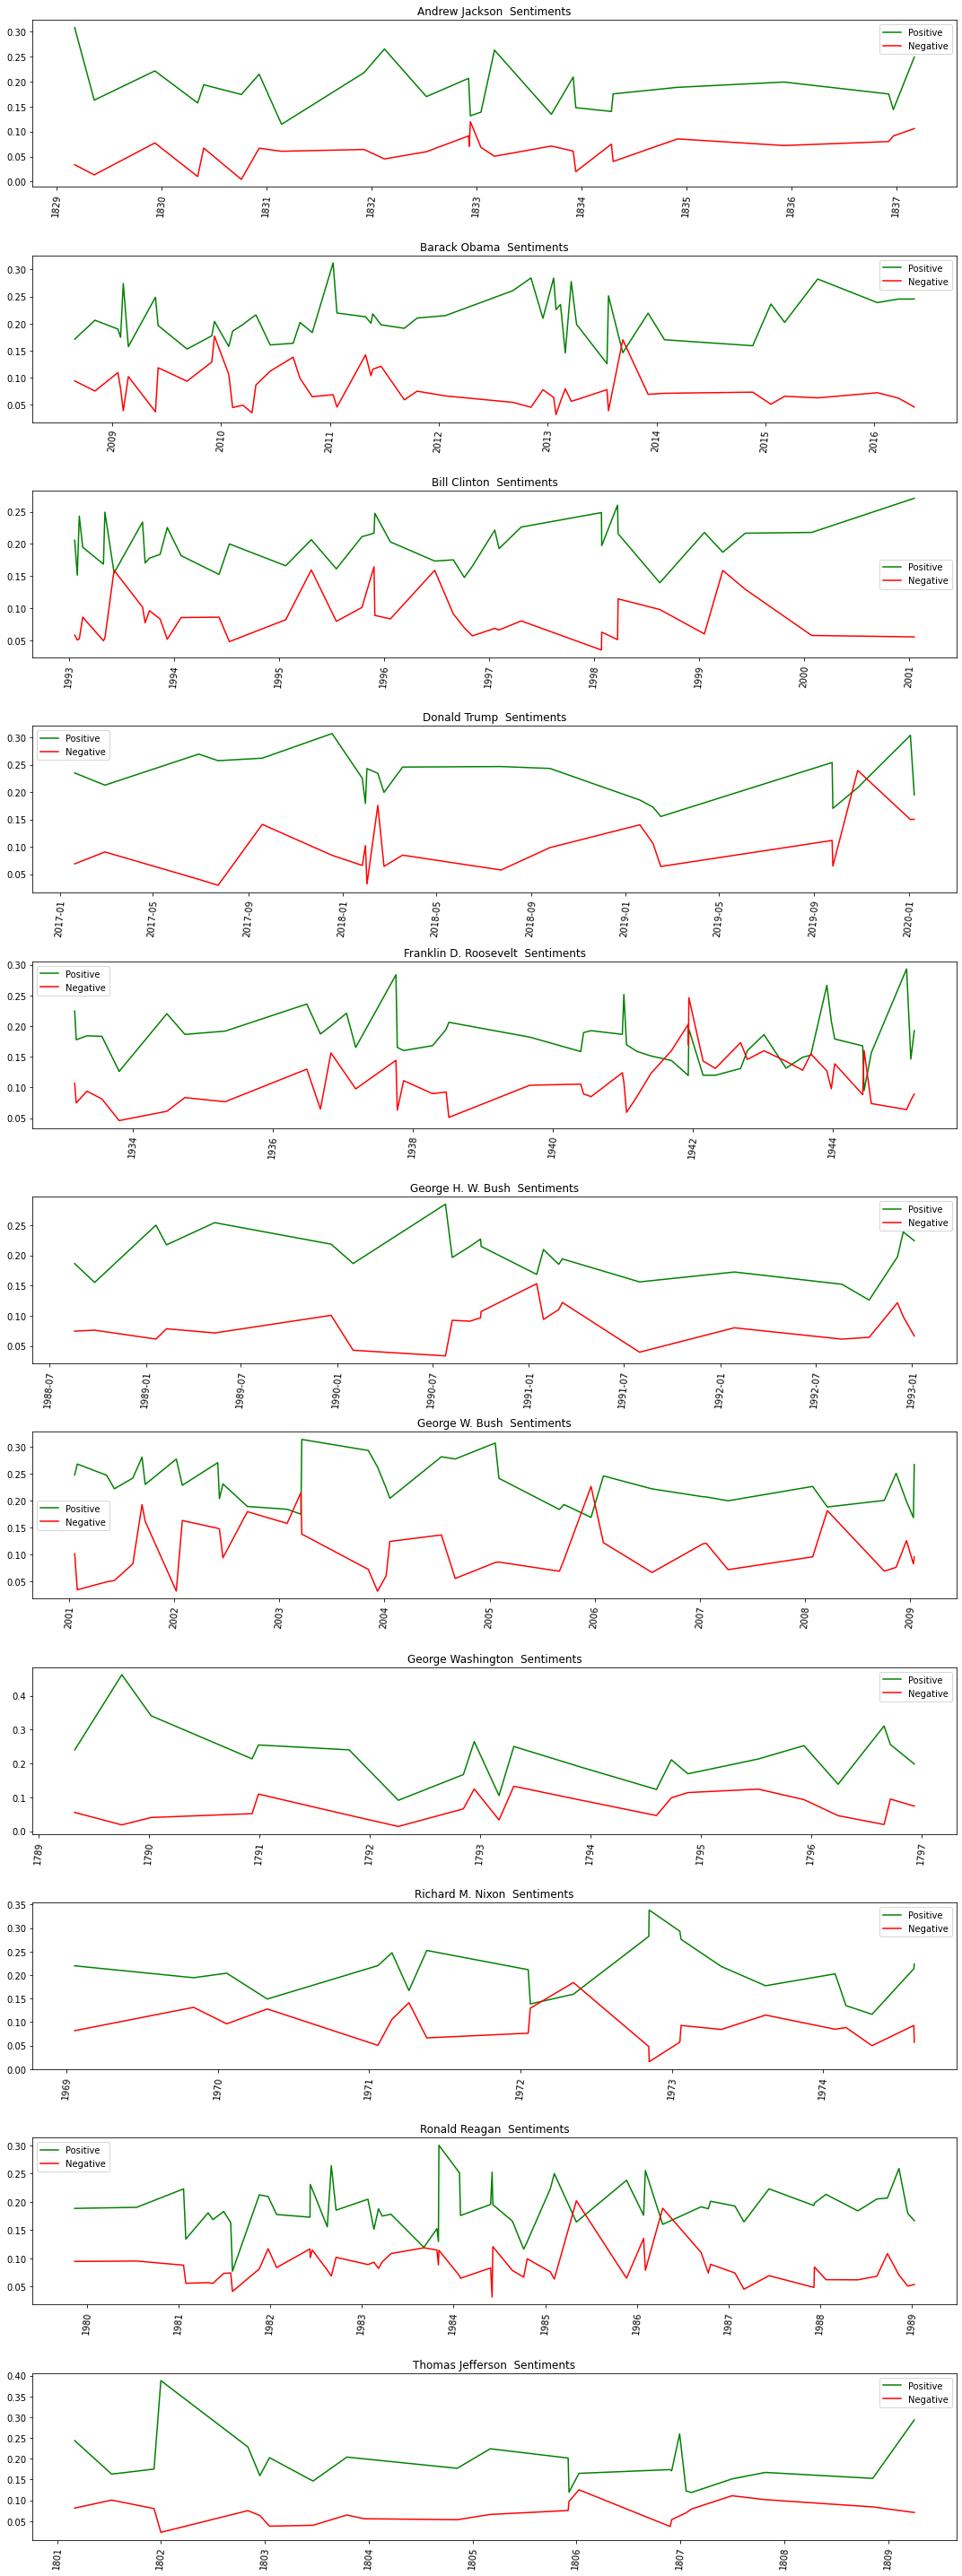

In [39]:
plt.figure(figsize=(15, 40)) 

for i in range(11):
    temp = df_vader[df_vader.President == i]
    plt.subplot(11,1,1 + i)
    plt.plot(temp.Date, temp.Positive,c="g", label = "Positive")
    plt.plot(temp.Date, temp.Negative,c="r", label = "Negative")
    #plt.plot(temp.Date, temp.Neutral,c="b", label = "Neutral")
    plt.xticks(rotation=85)
    plt.title(president_dict_inv[i] + "  Sentiments")
    plt.legend()

plt.tight_layout()
plt.show()

### Graph to visualise overall sentiment

In [40]:
df_vader["Year"] = df_vader["Date"].map(lambda x: x.year)

In [41]:
sentiment_timeline = df_vader.groupby("Year")[["Positive", "Negative"]].mean()
print(sentiment_timeline)

      Positive  Negative
Year                    
1789  0.350700  0.036760
1790  0.269427  0.067053
1791  0.240034  0.046879
1792  0.174141  0.067986
1793  0.181063  0.085462
...        ...       ...
2016  0.243088  0.060315
2017  0.257159  0.075848
2018  0.227036  0.085129
2019  0.190897  0.121038
2020  0.249306  0.150034

[87 rows x 2 columns]


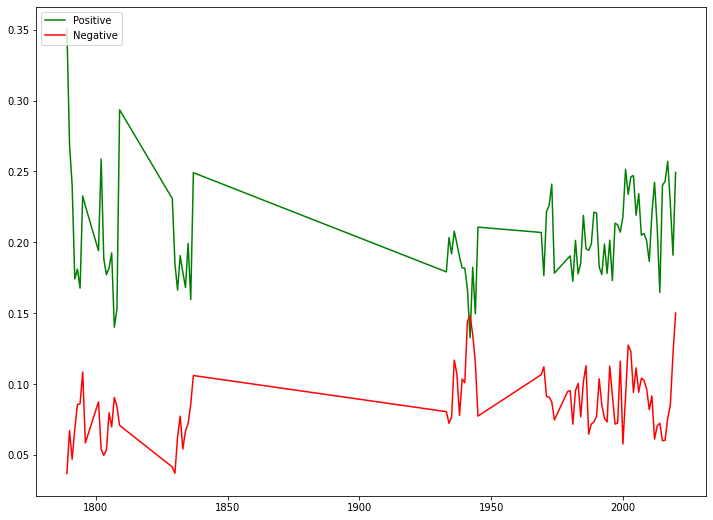

In [42]:
plt.figure(figsize=(12, 9)) 
plt.plot(sentiment_timeline.index, sentiment_timeline.Positive, c="g", label="Positive")
plt.plot(sentiment_timeline.index, sentiment_timeline.Negative, c="r", label="Negative")
plt.legend(loc="upper left")
plt.show()

Text(0, 0.5, 'Sentiment')

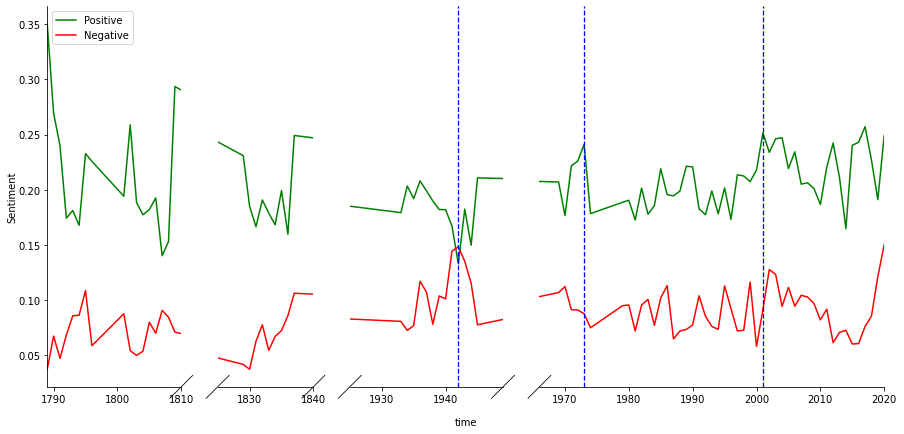

In [43]:
fig = plt.figure(figsize=(15, 7))
bax = brokenaxes(xlims=((1789, 1810),(1825,1840), (1925,1949),(1966,2020)), hspace=0.01)
x = sentiment_timeline.index
bax.plot(x, sentiment_timeline.Positive, label='Positive', color='g')
bax.plot(x,  sentiment_timeline.Negative, label='Negative', color='r')
bax.axvline(1942, color='b', linestyle='dashed', linewidth=1.3)
bax.axvline(1973, color='b', linestyle='dashed', linewidth=1.3)
bax.axvline(2001, color='b', linestyle='dashed', linewidth=1.3)
bax.legend(loc=2)
bax.set_xlabel('time')
bax.set_ylabel('Sentiment')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3f4f93b3-8db8-4d9f-b676-fca8a60ed250' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>